<a href="https://colab.research.google.com/github/GuilleLondero/ML_challenge_one_DS_telecomX/blob/main/Challenge_TelecomX2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importaciones**

In [19]:
# Conexion de google colab con drive:
from google.colab import drive

# Importar librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Extracción del Archivo Tratado**

In [5]:

df_ml_inicial = pd.read_csv('/content/drive/MyDrive/ONE/DATA SCIENCE/ML_challenge_TelecomX2/telecomX1_datos_tratados.csv')

print("✅ Datos cargados desde Drive")
print(f"Shape: {df_ml_inicial.shape}")

✅ Datos cargados desde Drive
Shape: (7043, 22)


In [6]:
df_ml_inicial.head()

,Id_Cliente,Fuga_Cliente,Genero,Ciudadano_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Facturacion_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


# **3. Eliminación de Columnas Irrelevantes**

In [7]:
# Identificar columnas a eliminar
columnas_a_eliminar = ['Id_Cliente']  # ID único - no aporta valor predictivo

# Crear dataset limpio sin columnas irrelevantes
df_ml = df_ml_inicial.drop(columns=columnas_a_eliminar)

In [8]:
df_ml.head(2)

,Fuga_Cliente,Genero,Ciudadano_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,Seguridad_Online,...,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Facturacion_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario
0,0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.19
1,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.00


# **4. Encoding**

## **4.1. 🔍 Identificación automática: Separamos variables por tipo de dato (numéricas vs categóricas)**

In [11]:
# Identificar variables categóricas y numéricas
numericas = df_ml.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = df_ml.select_dtypes(include=['object']).columns.tolist()

print("🔍 ANÁLISIS DE TIPOS DE VARIABLES:")
print(f"Variables numéricas ({len(numericas)}): {numericas}")
print(f"Variables categóricas ({len(categoricas)}): {categoricas}")

🔍 ANÁLISIS DE TIPOS DE VARIABLES:
Variables numéricas (17): ['Fuga_Cliente', 'Ciudadano_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Antiguedad_Meses', 'Servicio_Telefono', 'Lineas_Multiples', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Streaming', 'Peliculas_Streaming', 'Facturacion_Digital', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario']
Variables categóricas (4): ['Genero', 'Servicio_Internet', 'Tipo_Contrato', 'Metodo_Pago']


## **4.2. 📊 Análisis de categorías: Verifico cuántas categorías únicas tiene cada variable categórica**

In [12]:
# Analizar categorías únicas en variables categóricas
if categoricas:
    print("\n📊 ANÁLISIS DE CATEGORÍAS:")
    for col in categoricas:
        unique_vals = df_ml[col].nunique()
        categories = df_ml[col].unique()
        print(f"{col}: {unique_vals} categorías → {list(categories)}")


📊 ANÁLISIS DE CATEGORÍAS:
Genero: 2 categorías → ['Female', 'Male']
Servicio_Internet: 3 categorías → ['DSL', 'Fiber optic', 'No']
Tipo_Contrato: 3 categorías → ['One year', 'Month-to-month', 'Two year']
Metodo_Pago: 4 categorías → ['Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)']


## **4.3. ⚡ One-Hot Encoding: Uso pd.get_dummies() con:**

drop_first=True: Evita multicolinealidad perfecta

dtype=int: Variables binarias como enteros (0/1)

In [13]:
# Aplicar One-Hot Encoding
print(f"\n⚡ APLICANDO ONE-HOT ENCODING...")
print(f"Columnas antes del encoding: {df_ml.shape[1]}")

# Crear dataset con encoding
df_encoded = pd.get_dummies(df_ml, columns=categoricas, drop_first=True, dtype=int)

print(f"Columnas después del encoding: {df_encoded.shape[1]}")
print(f"Nuevas columnas creadas: {df_encoded.shape[1] - df_ml.shape[1]}")


⚡ APLICANDO ONE-HOT ENCODING...
Columnas antes del encoding: 21
Columnas después del encoding: 25
Nuevas columnas creadas: 4


## **4.4. 🆕 Nuevas columnas: Cada categoría se convierte en una columna binaria**

In [14]:
# Mostrar nuevas columnas creadas
nuevas_columnas = [col for col in df_encoded.columns if col not in df_ml.columns]
if nuevas_columnas:
    print(f"\n🆕 NUEVAS COLUMNAS GENERADAS ({len(nuevas_columnas)}):")
    for col in nuevas_columnas:
        print(f"  • {col}")


🆕 NUEVAS COLUMNAS GENERADAS (8):
  • Genero_Male
  • Servicio_Internet_Fiber optic
  • Servicio_Internet_No
  • Tipo_Contrato_One year
  • Tipo_Contrato_Two year
  • Metodo_Pago_Credit card (automatic)
  • Metodo_Pago_Electronic check
  • Metodo_Pago_Mailed check


## **4.5. ✅ Verificación: Confirmo que el encoding funcionó correctamente**

In [16]:
# Verificar estructura final
print(f"\n✅ ENCODING COMPLETADO:")
print(f"Dataset final: {df_encoded.shape[0]} filas × {df_encoded.shape[1]} columnas")
print(f"Target 'Fuga_Cliente' preservado: {'Fuga_Cliente' in df_encoded.columns}")

# Guardar resultado para los siguientes pasos
df_ml_encoded = df_encoded.copy()
print("🚀 Dataset listo para análisis de correlación")


✅ ENCODING COMPLETADO:
Dataset final: 7043 filas × 25 columnas
Target 'Fuga_Cliente' preservado: True
🚀 Dataset listo para análisis de correlación


# **5. Análisis de Correlación + Multicolinealidad**

## **5.1. 🎯 Correlación con Target:**
**Identificamos qué variables predicen mejor la cancelación (ordenadas por correlación absoluta)**

In [21]:
# Calcular matriz de correlación
correlation_matrix = df_ml_encoded.corr()

# 1. CORRELACIÓN CON EL TARGET (Fuga_Cliente) ("Variable objetivo")
target_correlations = correlation_matrix['Fuga_Cliente'].abs().sort_values(ascending=False)
print("🎯 TOP 10 VARIABLES MÁS CORRELACIONADAS CON FUGA_Cliente:")
print(target_correlations.head(10))

🎯 TOP 10 VARIABLES MÁS CORRELACIONADAS CON FUGA_Cliente:
Fuga_Cliente                     1.000000
Antiguedad_Meses                 0.352229
Servicio_Internet_Fiber optic    0.308020
Tipo_Contrato_Two year           0.302253
Metodo_Pago_Electronic check     0.301919
Servicio_Internet_No             0.227890
Cargo_Total                      0.199484
Cargo_Diario                     0.193412
Cargo_Mensual                    0.193356
Facturacion_Digital              0.191825
Name: Fuga_Cliente, dtype: float64


## **5.2. 🚨 Detección de Multicolinealidad:**
**Buscamos variables altamente correlacionadas entre sí (|r| > 0.8) que pueden confundir al modelo**

In [22]:
# 2. IDENTIFICAR MULTICOLINEALIDAD (variables entre sí)
# Buscar correlaciones altas (>0.8) excluyendo diagonal
mask_multicolinealidad = (correlation_matrix.abs() > 0.8) & (correlation_matrix != 1.0)
multicolineales = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if mask_multicolinealidad.iloc[i, j]:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            multicolineales.append((var1, var2, abs(corr_value)))

print(f"\n🚨 MULTICOLINEALIDAD DETECTADA (|r| > 0.8): {len(multicolineales)} pares")
for var1, var2, corr in sorted(multicolineales, key=lambda x: x[2], reverse=True):
    print(f"  • {var1} ↔ {var2}: r={corr:.3f}")


🚨 MULTICOLINEALIDAD DETECTADA (|r| > 0.8): 2 pares
  • Cargo_Mensual ↔ Cargo_Diario: r=1.000
  • Antiguedad_Meses ↔ Cargo_Total: r=0.826


## **5.3. 📊 Matriz de Correlación Visual:**

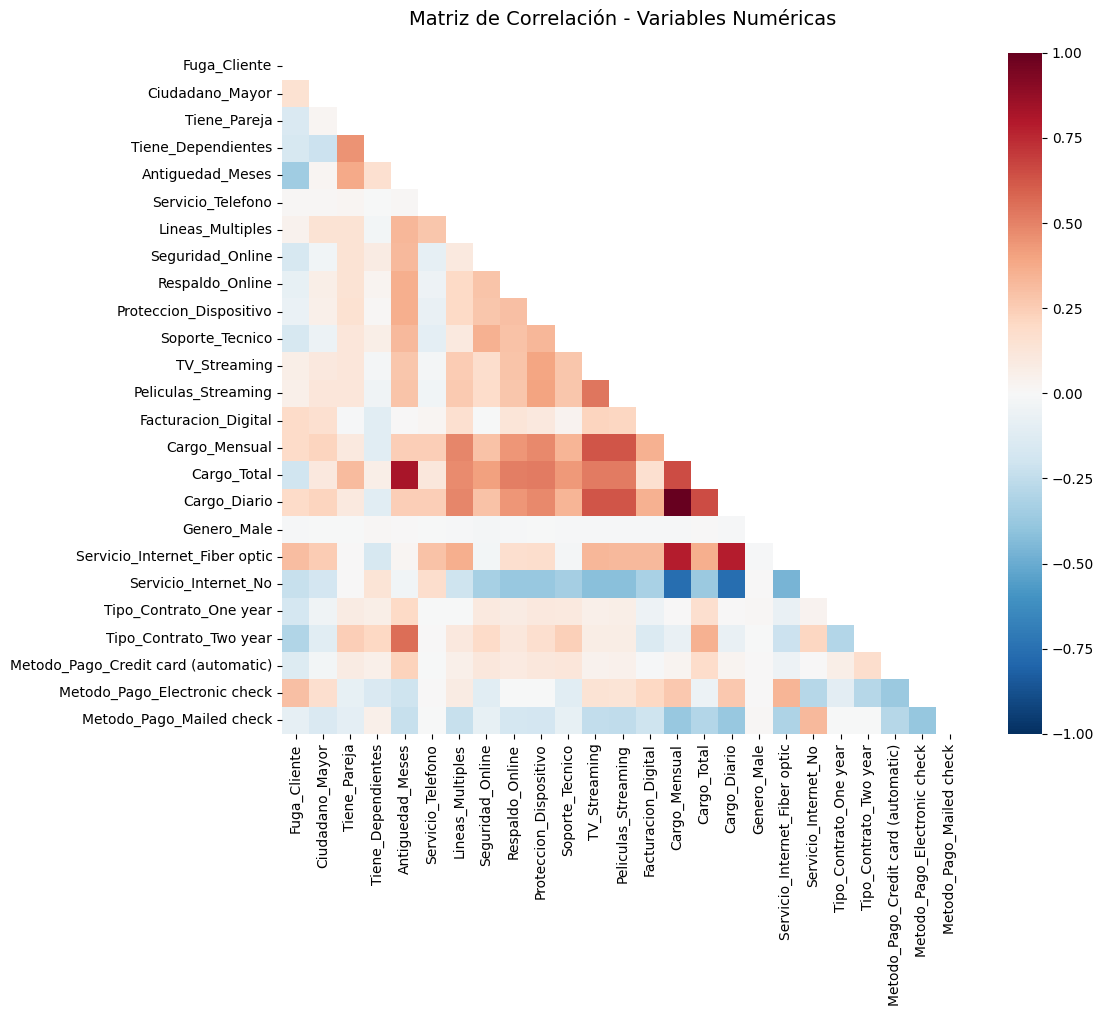

In [23]:
# 3. VISUALIZACIÓN: Matriz de correlación
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Solo triángulo inferior
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=False,  # Sin números (sería muy pequeño)
            cmap='RdBu_r',
            center=0,
            vmin=-1, vmax=1,
            square=True)
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

## **5.4 📈 Ranking Visual:**
**Barplot de las 10 variables más importantes para predecir cancelación**

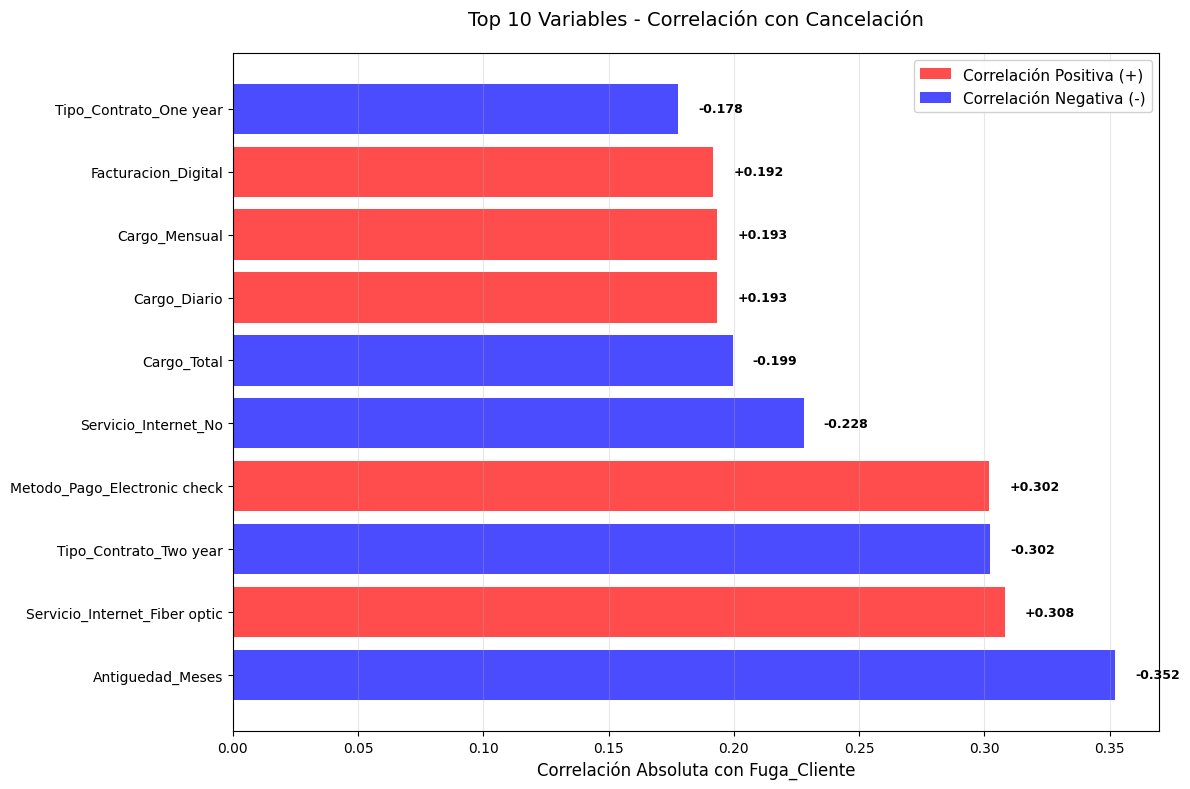


 📊 INTERPRETACIÓN:
🔴 ROJO (+): Mayor valor → Mayor probabilidad de cancelación
🔵 AZUL (-): Mayor valor → Menor probabilidad de cancelación


In [29]:
# 4. VISUALIZACIÓN: Correlaciones con Target

plt.figure(figsize=(12, 8))
target_corr_plot = target_correlations[1:11]  # Excluir Fuga_Cliente consigo misma

# Obtener correlaciones originales (con signo)
original_correlations = correlation_matrix['Fuga_Cliente'][target_corr_plot.index]
colors = ['red' if x > 0 else 'blue' for x in original_correlations]

# Crear gráfico
bars = plt.barh(range(len(target_corr_plot)), target_corr_plot.values, color=colors, alpha=0.7)

# Personalización
plt.yticks(range(len(target_corr_plot)), target_corr_plot.index)
plt.xlabel('Correlación Absoluta con Fuga_Cliente', fontsize=12)
plt.title('Top 10 Variables - Correlación con Cancelación', fontsize=14, pad=20)
plt.grid(axis='x', alpha=0.3)

# LEYENDA EN POSICIÓN SUPERIOR DERECHA
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', alpha=0.7, label='Correlación Positiva (+)'),
                   Patch(facecolor='blue', alpha=0.7, label='Correlación Negativa (-)')]
plt.legend(handles=legend_elements, loc='upper right', fontsize=11, framealpha=0.9)

# Agregar valores en las barras
for i, (bar, corr_val) in enumerate(zip(bars, original_correlations)):
    plt.text(bar.get_width() + 0.008, bar.get_y() + bar.get_height()/2,
             f'{corr_val:+.3f}', ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n 📊 INTERPRETACIÓN:")
print("🔴 ROJO (+): Mayor valor → Mayor probabilidad de cancelación")
print("🔵 AZUL (-): Mayor valor → Menor probabilidad de cancelación")

# **6. Selección de Features (eliminar correlacionadas)**


In [32]:
# Variables a eliminar por multicolinealidad
features_eliminar = ['Cargo_Diario', 'Cargo_Total']

print("🗑️ VARIABLES A ELIMINAR POR MULTICOLINEALIDAD:")
for feature in features_eliminar:
    if feature == 'Cargo_Diario':
        print(f"  • {feature}: r=1.000 con Cargo_Mensual (redundancia perfecta)")
    elif feature == 'Cargo_Total':
        print(f"  • {feature}: r=0.826 con Antiguedad_Meses (alta correlación)")

# Eliminar features problemáticas
df_ml_features = df_ml_encoded.drop(columns=features_eliminar)

print(f"\n✅ SELECCIÓN COMPLETADA:")
print(f"Columnas antes: {df_ml_encoded.shape[1]}")
print(f"Columnas después: {df_ml_features.shape[1]}")
print(f"Features eliminadas: {len(features_eliminar)}")

# Recalcular correlaciones con target (verificación)
nuevas_correlaciones = df_ml_features.corr()['Fuga_Cliente'].abs().sort_values(ascending=False)
print(f"\n📊 TOP 5 VARIABLES TRAS SELECCIÓN:")
print(nuevas_correlaciones.head(6))  # 6 para incluir target

🗑️ VARIABLES A ELIMINAR POR MULTICOLINEALIDAD:
  • Cargo_Diario: r=1.000 con Cargo_Mensual (redundancia perfecta)
  • Cargo_Total: r=0.826 con Antiguedad_Meses (alta correlación)

✅ SELECCIÓN COMPLETADA:
Columnas antes: 25
Columnas después: 23
Features eliminadas: 2

📊 TOP 5 VARIABLES TRAS SELECCIÓN:
Fuga_Cliente                     1.000000
Antiguedad_Meses                 0.352229
Servicio_Internet_Fiber optic    0.308020
Tipo_Contrato_Two year           0.302253
Metodo_Pago_Electronic check     0.301919
Servicio_Internet_No             0.227890
Name: Fuga_Cliente, dtype: float64


In [37]:
df_ml_features.head(2)

,Fuga_Cliente,Ciudadano_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,...,Facturacion_Digital,Cargo_Mensual,Genero_Male,Servicio_Internet_Fiber optic,Servicio_Internet_No,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,1,65.6,0,0,0,1,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,0,59.9,1,0,0,0,0,0,0,1
